# The Movie DataBase

Rubén Martín Guerrero y Juan José Mostazo Peláez

## Índice
* [1. Introducción](#introduccion)
* [2. Análisis Exploratorio](#analisis)
* [3. Machine Learning](#machine-learning)
* [4. Conclusiones](#conclusiones)

<a id="introduccion"></a>
## 1. Introducción
Para el desarrollo de la práctica nos hemos basado en un Dataset de Kaggle, llamado: **"TMDB_Movie dataset"**.
Consiste en un DataSet con información basado en la popular BBDD de películas "The Movie DataBase" (TMDB) con una comunidad muy activa que la mantiene desde 2.008 ([https://www.themoviedb.org/about](https://www.themoviedb.org/about)).

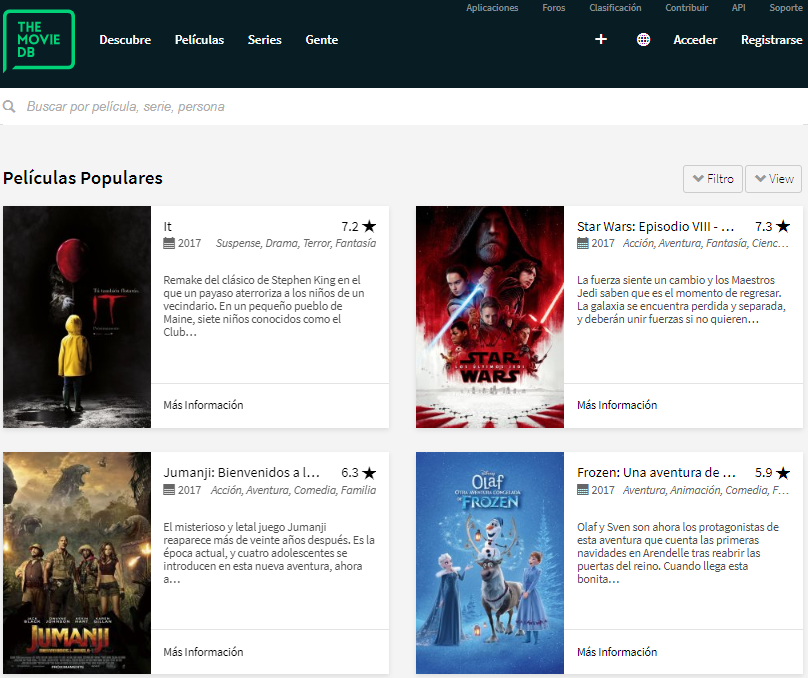

El DataSet cuenta con casi 11.000 películas, entre los años 1.960 y 2.015. En el que pueden consultarse algunos aspectos interesantes como: valoración, presupuesto, ingresos generados, popularidad, ...

La práctica consistirá en ... <span style="color:red">**TODO**</span>

<a id="analisis"></a>
## 2. Análisis Exploratorio
En este apartado ... <span style="color:red">**TODO**</span>

### Columnas del DataSet
Cuando se analiza un DataSet, es importante entender qué estamos analizando exactamente. Por ello consideramos fundamental que antes de comenzar con el análisis comprendamos la información que nos ofrece cada una de las columnas.

* **``id``**: Identificador de la película en TMDB.
* **``imdb_id``**: Identidicador de la película en [http://www.imdb.com/](http://www.imdb.com/).
* **``popularity``**: El índice de popularidad de TMDB, se basa en un algoritmo propio, que les permite saber cómo de relevante es una película frente a otras. Los parámetros en los que se basa el algoritmo, pueden verse en: [https://developers.themoviedb.org/3/getting-started/popularity](https://developers.themoviedb.org/3/getting-started/popularity).
* **``budget``**: Presupuesto con el que contó la producción de la película.
* **``revenue``**: Ingresos generados por la película.
* **``budget_adj``**: Presupuesto con el que contó la producción de la película, ajustado con el cambio de inflación (ideal para comparar presupuestos de películas antiguas y nuevas).
* **``revenue_adj``**: Ingresos generados por la película, ajustados con el cambio de inflación.
* **``original_title``**: Título original de la pelicula.
* **``cast``**: Lista de actores principales que aparecen en la película, separados por el caracter "|".
* **``homepage``**: Página web oficial de la película.
* **``director``**: Lista de directores de la película, separados por el caracter "|".
* **``tagline``**: Titular, frase corta utilizada como reclamo.
* **``keywords``**: Palabras clave asociadas a la película.
* **``overview``**: Pequeño resumen del argumento de la película.
* **``runtime``**: Duración de la película, expresada en minutos.
* **``genres``**: Lista de géneros a los que pertenece la película, separados por el caracter "|".
* **``production_companies``**: Lista de enpresas productoras que intervienen en la película, separadas por el caracter "|".
* **``vote_count``**: Número de usuarios de TMDB que han valorado la película.
* **``vote_average``**: Valoración media de los usuarios en TMDB.
* **``release_date``**: Fecha de publicación de la película, expresada en formato: mm/dd/yy.
* **``release_year``**: Año de publicación de la película.

Una vez comprendida la información que compone el DataSet, podemos continuar con el nuestro análisis.

### Importamos las librerías necesarias
Realizamos las importaciones de las librerías que vamos a utilizar en este apartado:

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importamos el DataSet
Comenzamos importando el DataSet del fichero "tmdb-movies.csv":

In [451]:
raw_movies = pd.read_csv("tmdb-movies.csv")
raw_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Vamos a comenzar con el análisis de los datos:

In [452]:
raw_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

En un primer vistazo observamos que el DataSet consta de 10.866 entradas exactamente. Sin embargo, en algunas columnas nos está mostrando una longitud inferior, por lo que parece que hay valores nulos. Tendremos que analizarlo esto con más detalle para limpiar los valores nulos.

### Análisis de valores nulos
Vamos a comenzar observando los valores nulos que existen en cada una de las columnas, para posteriormente tomar las decisiones adecuadas a cada caso.

In [453]:
raw_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Vemos que hay muchos valores nulos en algunas columnas poco relevantes para nosotros, como son: "imdb_id", "homepage", "tagline", "keywords" y "overview". Puesto que no vamos a utlizar estas columnas, setearemos en todos sus valores nulos un string vacío.

También tenemos valores nulos en otras columnas más relevantes, y que sí podrían ser explotadas. Se trata de: "cast", "director", "genres" y "production_companies". Vamos a asignar el valor "\_unknown\_" a todos sus valores nulos, de forma que si en el análisis posterior nos encontramos un dato de este tipo, resulte evidente en un primer vistazo.

In [454]:
raw_movies[["imdb_id", "homepage", "tagline", "keywords", "overview"]] = raw_movies[["imdb_id", "homepage", "tagline", "keywords", "overview"]].fillna("")
raw_movies[["cast", "director", "genres", "production_companies"]] = raw_movies[["cast", "director", "genres", "production_companies"]].fillna("_unknown_")

Comprobamos como han quedado los valores nulos después de la limpieza anterior:

In [455]:
raw_movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Aparentemente, hemos eliminado todos los valores nulos, pero nos preocupa que no había ningún error en los campos numéricos. Es posible que los campos númericos los nulos se estén interpretando como "0". Por ello, vamos a recorrer todas las columnas numéricas en busca del valor "0":

In [456]:
raw_movies.apply(lambda x: x == 0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Como puede verse, tenemos algún problema en "runtime", aunque es muy probable que no usemos este dato. En todo caso, debemos tenerlo en cuenta.

Sin embargo, **más de la mitad de las películas** no tienen "budget" o "revenue". Esto es algo que debemos tener en cuenta en los análisis posteriores.

### Preparando el DataSet
Antes de comenzar, vamos a crear un DataFrame llamado "movies", al que vamos a aplicar algunos cambios para facilitar el trabajo posterior:
* Añadiremos dos columnas adicionales al dataset calculadas a partir de las actuales. Serán "**``profits``**" y "**``profits_adj``**", que representan los beneficios obtenidos por la película y los beneficios obtenidos por la película ajustados con el cambio de inflación, respectivamente.
* Las columnas "**``cast``**", "**``director``**", "**``genres``**" y "**``production_companies``**", son listas separadas por el caracter "|", vamos a transformar el tipo de datos de cada una de las columnas por array.

In [457]:
movies = pd.concat((raw_movies, raw_movies["revenue"]-raw_movies["budget"], raw_movies["revenue_adj"]-raw_movies["budget_adj"]), axis=1)
movies.columns = np.append(raw_movies.columns.values, ["profits", "profits_adj"])
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08


### Preparando algunos DataFrame y funciones interesantes
Vamos a preparar un pequeño conjunto de DataFrames que serán empleados por algunas consultas posteriores.

En todos ellos vamos a utilizar un conjunto comunes de columnas, así que lo declaramos en una única variable para evitar tener que escribirlo continuamente:

In [458]:
COLUMNS_NAMES = ["id", "original_title", "release_year", "vote_average", "vote_count", "popularity", "budget_adj", "revenue_adj", "profits_adj"]

#### Películas por género
A la hora de análizar un DataSet de cine, el género nos parece un aspecto muy relevante. Por ello, vamos a crear un nuevo DataFrame que vamos a llamar "movies\_by\_genre". Cada película tendrá tantas entradas duplicadas, como géneros a los que pertenece. De esta forma nos resulta muy fácil trabajar con las películas por género, puesto que ya sólo son valores únicos, y no listas de géneros.

En este DataFrame eliminaremos las películas con valor nulo en el género ("\_unknown\_").

In [459]:
movies_by_genre = movies[movies["genres"] != "_unknown_"].set_index(COLUMNS_NAMES)["genres"].apply(lambda x: pd.Series(x.split("|"))).stack().reset_index()
movies_by_genre.columns = COLUMNS_NAMES + ["genre_count", "genre"]
movies_by_genre.head(5)

,id,original_title,release_year,vote_average,vote_count,popularity,budget_adj,revenue_adj,profits_adj,genre_count,genre
0,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,0,Action
1,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,1,Adventure
2,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,2,Science Fiction
3,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,3,Thriller
4,76341,Mad Max: Fury Road,2015,7.1,6185,28.419936,1.379999e+08,3.481613e+08,2.101614e+08,0,Action


#### Películas por director
Otro aspecto importante a explotar es el director, por ello al igual que hemos hecho con el género, vamos a crear un nuevo DataFrame que vamos a llamar "movies\_by\_director". En él cada película tendrá tantas entradas duplicadas, como directores distintos han participado en ella. De esta forma nos resulta muy fácil trabajar con los directores, puesto que ya sólo son valores únicos, y no listas de nombres.

En este DataFrame eliminaremos las películas con valor nulo en el director ("\_unknown\_").

In [460]:
movies_by_director = movies[movies["director"] != "_unknown_"].set_index(COLUMNS_NAMES + ["genres"])["director"].apply(lambda x: pd.Series(x.split("|"))).stack().reset_index()
movies_by_director.columns = COLUMNS_NAMES + ["genres", "director_count", "director"]
movies_by_director.head(5)

,id,original_title,release_year,vote_average,vote_count,popularity,budget_adj,revenue_adj,profits_adj,genres,director_count,director
0,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Action|Adventure|Science Fiction|Thriller,0,Colin Trevorrow
1,76341,Mad Max: Fury Road,2015,7.1,6185,28.419936,1.379999e+08,3.481613e+08,2.101614e+08,Action|Adventure|Science Fiction|Thriller,0,George Miller
2,262500,Insurgent,2015,6.3,2480,13.112507,1.012000e+08,2.716190e+08,1.704191e+08,Adventure|Science Fiction|Thriller,0,Robert Schwentke
3,140607,Star Wars: The Force Awakens,2015,7.5,5292,11.173104,1.839999e+08,1.902723e+09,1.718723e+09,Action|Adventure|Science Fiction|Fantasy,0,J.J. Abrams
4,168259,Furious 7,2015,7.3,2947,9.335014,1.747999e+08,1.385749e+09,1.210949e+09,Action|Crime|Thriller,0,James Wan


#### Películas por actor
Tambien un aspecto muy relevante el reparto. Por ello, vamos a crear un nuevo DataFrame que vamos a llamar "movies\_by\_actor". Cada película tendrá tantas entradas duplicadas, como actores actuen en ella.

En este DataFrame eliminaremos las películas con valor nulo en los actores ("\_unknown\_").

In [461]:
movies_by_actor = movies[movies["cast"] != "_unknown_"].set_index(COLUMNS_NAMES + ["genres"])["cast"].apply(lambda x: pd.Series(x.split("|"))).stack().reset_index()
movies_by_actor.columns = COLUMNS_NAMES + ["genres", "actor_count", "actor"]
movies_by_actor.head(5)

,id,original_title,release_year,vote_average,vote_count,popularity,budget_adj,revenue_adj,profits_adj,genres,actor_count,actor
0,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Action|Adventure|Science Fiction|Thriller,0,Chris Pratt
1,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Action|Adventure|Science Fiction|Thriller,1,Bryce Dallas Howard
2,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Action|Adventure|Science Fiction|Thriller,2,Irrfan Khan
3,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Action|Adventure|Science Fiction|Thriller,3,Vincent D'Onofrio
4,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Action|Adventure|Science Fiction|Thriller,4,Nick Robinson


#### Películas por género y director
Creamos un nuevo DataFrame llamado "movies\_by\_director\_genre", que será una mezcla de "movies\_by\_director" y "movies\_by\_genre".

En este DataFrame eliminaremos las películas con valor nulo en el género y el director ("\_unknown\_").

In [462]:
movies_by_director_genre = movies_by_director[movies_by_director["genres"] != "_unknown_"].set_index(COLUMNS_NAMES + ["director"])["genres"].apply(lambda x: pd.Series(x.split("|"))).stack().reset_index()
movies_by_director_genre.columns = COLUMNS_NAMES + ["director", "genre_count", "genre"]
movies_by_director_genre.head(5)

,id,original_title,release_year,vote_average,vote_count,popularity,budget_adj,revenue_adj,profits_adj,director,genre_count,genre
0,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow,0,Action
1,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow,1,Adventure
2,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow,2,Science Fiction
3,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Colin Trevorrow,3,Thriller
4,76341,Mad Max: Fury Road,2015,7.1,6185,28.419936,1.379999e+08,3.481613e+08,2.101614e+08,George Miller,0,Action


#### Películas por género y actor
Creamos un nuevo DataFrame llamado "movies\_by\_actor\_genre", que será una mezcla de "movies\_by\_actor" y "movies\_by\_genre".

En este DataFrame eliminaremos las películas con valor nulo en el género y los actores ("\_unknown\_").

In [463]:
movies_by_actor_genre = movies_by_actor[movies_by_actor["genres"] != "_unknown_"].set_index(COLUMNS_NAMES + ["actor"])["genres"].apply(lambda x: pd.Series(x.split("|"))).stack().reset_index()
movies_by_actor_genre.columns = COLUMNS_NAMES + ["actor", "genre_count", "genre"]
movies_by_actor_genre.head(5)

,id,original_title,release_year,vote_average,vote_count,popularity,budget_adj,revenue_adj,profits_adj,actor,genre_count,genre
0,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,0,Action
1,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,1,Adventure
2,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,2,Science Fiction
3,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,3,Thriller
4,135397,Jurassic World,2015,6.5,5562,32.985763,1.379999e+08,1.392446e+09,1.254446e+09,Bryce Dallas Howard,0,Action


#### Función ``clean_budget_revenue``: elimina las películas con valores nulos en los importes
Declaramos una función que utilizaremos posteriormente en varios sitios. Dado un DataFrame, devuelve uno igual pero habiendo eliminado las películas con valores nulos en el presupuesto o los ingresos.

In [464]:
def clean_budget_revenue(movies):
    temp_movies = movies[movies["budget_adj"] != 0]
    return temp_movies[temp_movies["revenue_adj"] != 0]

#### Función ``clean_low_votes``: elimina las películas con pocas valoraciones de los usuarios
Declaramos una función que dado un DataFrame, devuelve uno igual pero elimina las películas con menos de 100 valoraciones de usuarios. El objetivo es considerar sólo las películas valoradas por un conjunto de usuarios suficientemente representativo.

In [465]:
def clean_low_votes(movies):
    return movies[movies["vote_count"] >= 100]

### Películas mejor valoradas de la historia
Para comenzar a "jugar" con el Dataset, vamos a realizar una consulta sencilla. ¿Cúales son las películas mejor valoradas por los usuarios?

In [466]:
movies[["original_title","vote_average", "vote_count"]].sort_values("vote_average", ascending=False).head(10)

,original_title,vote_average,vote_count
3894,The Story of Film: An Odyssey,9.2,14
538,The Mask You Live In,8.9,11
2269,Life Cycles,8.8,27
1200,Black Mirror: White Christmas,8.8,41
6911,Pink Floyd: Pulse,8.7,23
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,10
3690,The Art of Flight,8.5,60
8411,Queen - Rock Montreal,8.5,14
8221,A Personal Journey with Martin Scorsese Throug...,8.5,11
5830,Doctor Who: The Time of the Doctor,8.5,26


Repetimos el cálculo anterior, pero esta vez vamos a descartar las películas que han sido valoradas por menos de 100 usuarios, con el objetivo de considerar sólo las películas valoradas por un conjunto de usuarios suficientemente representativo.

In [467]:
clean_low_votes(movies)[["original_title","vote_average", "vote_count"]].sort_values("vote_average", ascending=False).head(10)

,original_title,vote_average,vote_count
4178,The Shawshank Redemption,8.4,5754
7269,The Godfather,8.3,3970
650,Whiplash,8.2,2372
2875,The Dark Knight,8.1,8432
2409,Fight Club,8.1,5923
10222,Schindler's List,8.1,2632
9758,The Godfather: Part II,8.1,2131
4177,Pulp Fiction,8.1,5343
4179,Forrest Gump,8.1,4856
2414,The Green Mile,8.0,2299


### Películas más populares
¿Cúales son las películas más populares en TMDB?

In [468]:
movies[["original_title","popularity"]].sort_values("popularity", ascending=False).head(10)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


### Directores con más películas de la historia
¿Cuáles son los directores con más películas entre 1.960 y 2.015?

In [469]:
best_directors = movies_by_director.groupby("director").size().reset_index()
best_directors.columns = ["director", "count"]
best_directors.sort_values("count", ascending=False).head(10)

,director,count
5282,Woody Allen,46
939,Clint Eastwood,34
3359,Martin Scorsese,31
4857,Steven Spielberg,30
4263,Ridley Scott,23
4856,Steven Soderbergh,23
4418,Ron Howard,22
2499,Joel Schumacher,21
618,Brian De Palma,20
4981,Tim Burton,20


Una vez que tenemos la estructura de datos adecuada, podemos empezar a analizar...

### Distribución de las películas por género
En la siguiente tabla podemos ver cómo se han ido distribuyendo las películas por género, entre 1.960 y 2.015.

In [470]:
size = len(movies_by_genre)
genres_distribution = movies_by_genre.groupby("genre").size().apply(lambda x: pd.Series([x, 100*x/size])).reset_index()
genres_distribution.columns = ["genre", "count", "percentage"]
genres_distribution.sort_values("count", ascending=False)

,genre,count,percentage
6,Drama,4761,17
3,Comedy,3793,14
17,Thriller,2908,10
0,Action,2385,8
14,Romance,1712,6
11,Horror,1637,6
1,Adventure,1471,5
4,Crime,1355,5
7,Family,1231,4
15,Science Fiction,1230,4


Si lo mostramos gráficamente, quedaría de la siguiente forma:

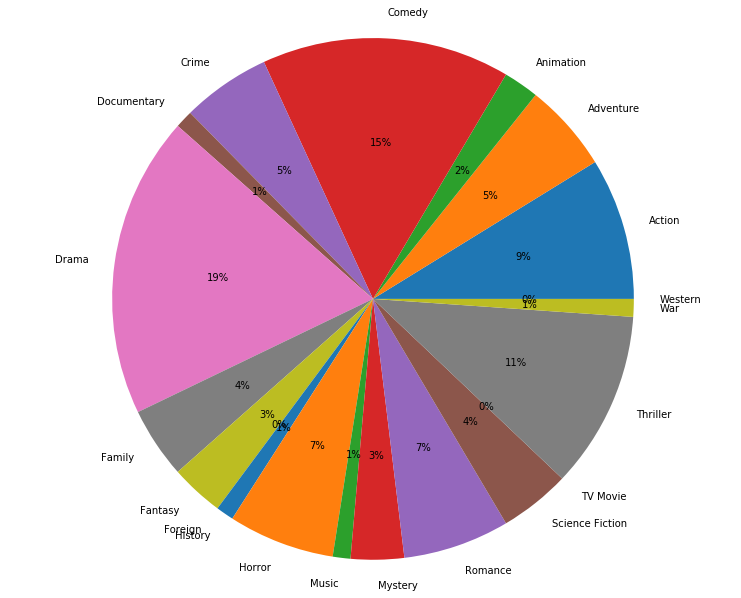

In [471]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_axes((0,0,1,1))
ax1.pie(genres_distribution["percentage"], labels=genres_distribution["genre"], autopct="%.0f%%")
ax1.axis("equal")
plt.show()

### Directores con más películas en cada género
¿Cuáles son los directores con más películas en cada uno de los géneros entre 1.960 y 2.015?

In [472]:
best_directors_genre = pd.crosstab(movies_by_director_genre["director"], movies_by_director_genre["genre"])
best_directors_genre = pd.concat((best_directors_genre.idxmax(), best_directors_genre.max()), axis=1).reset_index()
best_directors_genre.columns = ["director", "genre", "count"]
best_directors_genre

,director,genre,count
0,Action,Robert Rodriguez,14
1,Adventure,Steven Spielberg,12
2,Animation,Don Bluth,11
3,Comedy,Woody Allen,39
4,Crime,Clint Eastwood,13
5,Documentary,Alastair Fothergill,8
6,Drama,Clint Eastwood,27
7,Family,Don Bluth,11
8,Fantasy,Tim Burton,12
9,Foreign,Chang Cheh,2


### Distribución de las películas por género y fecha
En la siguiente tabla podemos ver cómo se han ido distribuyendo las películas por género durante cada año, entre 1.960 y 2.015.

In [473]:
genres_by_year_distribution = pd.crosstab(movies_by_genre["genre"], movies_by_genre["release_year"])
genres_by_year_distribution

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,,,,,,,,,,,,,,,,,,,,,
Action,8,7,8,4,5,9,14,7,6,10,...,80,95,99,108,108,115,99,121,129,107
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,72,59,62,50,67,67,69
Animation,0,1,0,1,2,1,3,2,3,3,...,39,32,33,48,50,46,40,42,36,39
Comedy,8,10,5,13,16,7,16,17,9,12,...,155,151,169,198,169,172,176,175,185,162
Crime,2,2,3,4,10,2,5,7,5,3,...,53,65,62,52,51,48,54,71,65,51
Documentary,0,0,0,0,0,0,1,1,0,0,...,16,19,26,25,35,49,49,62,73,57
Drama,13,16,21,13,20,20,16,16,20,13,...,197,197,233,224,211,214,232,253,284,260
Family,3,5,2,3,4,3,7,3,5,4,...,65,45,56,60,55,72,42,48,43,44
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,49,44,46,34,39,36,33


A cotinuación lo mostraremos en una gráfica, que además nos permite observar el crecimiento de la industria cinematográfica a lo largo del tiempo.

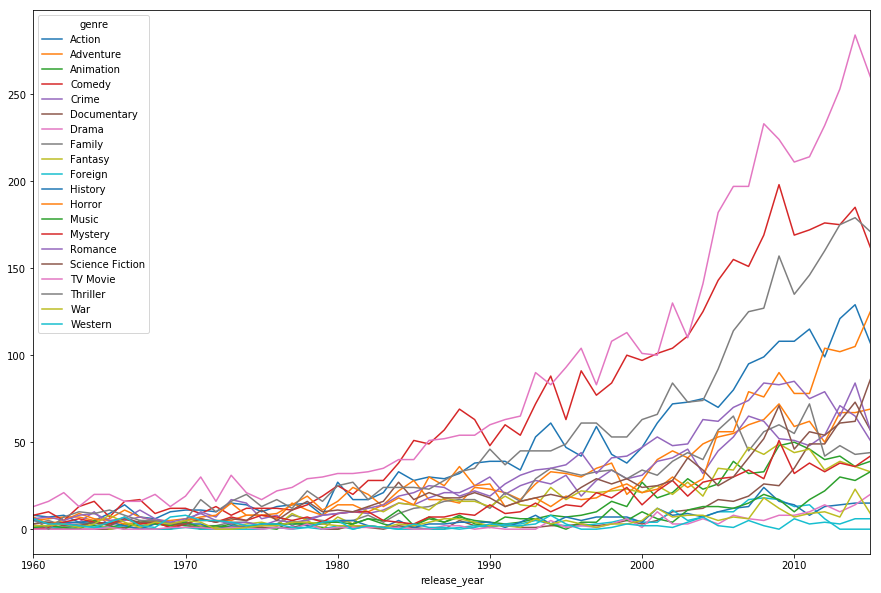

In [474]:
genres_by_year_distribution.T.plot(kind="line",figsize=(15,10));
plt.show();

### Valoración de las películas por género y fecha
En la siguiente tabla mostramos las valoraciones medias por género que ofrecieron los usuarios a las películas durante cada año, entre 1.960 y 2.015. Para ello calculamos la media de valoraciones para las películas de cada genero, en cada año. Al igual que antes sólo tenemos en cuenta las películas valoradas por más de 100 usuarios.

In [475]:
movies_by_genre_high_votes = clean_low_votes(movies_by_genre)
vote_avg_distribution = pd.crosstab(movies_by_genre_high_votes["genre"], movies_by_genre_high_votes["release_year"], values=movies_by_genre_high_votes["vote_average"], aggfunc=np.nanmean).fillna(0)
vote_avg_distribution

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,,,,,,,,,,,,,,,,,,,,,
Action,6.95,0.0,6.80,6.700000,7.00,6.30,0.0,6.700000,6.800000,6.500000,...,6.084848,5.972973,6.013953,6.020000,6.168000,6.044444,6.041667,6.169841,6.194915,6.116981
Adventure,7.15,6.6,7.10,7.100000,7.00,6.30,0.0,6.800000,7.100000,6.733333,...,6.093333,6.044000,6.050000,6.017500,6.358824,6.153125,6.227586,6.514706,6.462857,6.334091
Animation,0.00,6.6,0.00,6.700000,0.00,0.00,7.1,7.000000,0.000000,0.000000,...,6.073333,6.200000,6.721429,6.582353,6.771429,6.276471,6.800000,6.600000,6.947368,6.787500
Comedy,7.90,7.0,0.00,7.150000,7.45,0.00,7.1,7.500000,6.600000,0.000000,...,5.983019,6.072340,5.892982,6.031667,6.061667,6.033803,6.054545,6.225862,6.235897,6.280000
Crime,0.00,6.6,7.70,6.800000,0.00,0.00,0.0,7.400000,6.700000,6.800000,...,6.221739,6.427586,6.295833,6.000000,6.044000,6.330435,6.114286,6.095238,6.180769,6.172414
Documentary,0.00,0.0,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,...,6.450000,7.133333,7.233333,7.433333,7.240000,7.000000,7.200000,7.950000,7.766667,7.066667
Drama,7.60,7.0,7.25,7.500000,7.40,7.05,6.8,7.433333,6.966667,6.866667,...,6.507018,6.571186,6.459677,6.428358,6.277215,6.407792,6.378667,6.501000,6.551852,6.463000
Family,0.00,6.6,0.00,6.700000,7.15,7.20,7.1,7.000000,6.600000,0.000000,...,5.925000,6.194737,6.225926,6.222222,6.300000,6.248148,6.494118,6.250000,6.657895,6.542105
Fantasy,7.30,0.0,0.00,0.000000,7.20,0.00,0.0,0.000000,6.600000,0.000000,...,6.070000,5.847619,5.978947,6.032143,5.917391,6.020000,6.233333,6.289474,6.447059,6.431250


Vamos a estandarizar los resultados de valoración media de la tabla anterior. Se utiliza la media como línea de separación para identificar las películas bien valoradas. De forma que el valor positivo indica que la película está bien valorada (por encima de la media) y los valores negativos indican que la película está peor valorada que la media.

In [476]:
(vote_avg_distribution - vote_avg_distribution.mean()) / vote_avg_distribution.std(ddof = 0)

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.728727,-0.851531,0.966571,0.543636,0.888129,1.024248,-0.679135,0.840138,0.640157,1.225052,...,0.193712,-0.002393,-0.600890,0.220072,-0.245078,-0.551966,-0.474711,-0.397315,0.058641,0.035720
Adventure,0.783345,1.111374,1.051007,0.663683,0.888129,1.024248,-0.679135,0.868357,0.733162,1.296420,...,0.199800,0.046817,-0.514411,0.218794,0.149410,-0.158871,-0.021393,0.188732,0.236788,0.183357
Animation,-1.169268,1.111374,-0.947313,0.543636,-1.053057,-0.850407,1.517875,0.924795,-1.467956,-0.763042,...,0.185450,0.154898,1.096421,0.507663,1.002386,0.287267,1.374294,0.333677,0.558926,0.491678
Comedy,0.988165,1.230338,-0.947313,0.678689,1.012920,-0.850407,1.517875,1.065891,0.578154,-0.763042,...,0.120647,0.066452,-0.891113,0.226039,-0.464900,-0.590456,-0.443309,-0.302116,0.085889,0.146574
Crime,-1.169268,1.111374,1.219879,0.573647,-1.053057,-0.850407,-0.679135,1.037672,0.609156,1.316811,...,0.291933,0.312575,0.075371,0.209844,-0.501422,0.482454,-0.297647,-0.524092,0.049235,0.073415
Documentary,-1.169268,-0.851531,-0.947313,-1.467158,-1.053057,-0.850407,-0.679135,-1.050543,-1.467956,-0.763042,...,0.455714,0.801535,2.324537,0.942860,1.971060,2.904252,2.349593,2.627805,1.103654,0.681514
Drama,0.906237,1.230338,1.093225,0.783730,0.999054,1.247421,1.425044,1.047078,0.691827,1.337201,...,0.496625,0.412065,0.468451,0.428909,-0.019298,0.762253,0.346979,0.165441,0.295958,0.271016
Family,-1.169268,1.111374,-0.947313,0.543636,0.929726,1.292056,1.517875,0.924795,0.578154,-0.763042,...,0.079018,0.151251,-0.092345,0.323490,0.027805,0.184825,0.628477,-0.261097,0.366463,0.324808
Fantasy,0.824309,-0.851531,-0.947313,-1.467158,0.943592,-0.850407,-0.679135,-1.050543,0.578154,-0.763042,...,0.183058,-0.089241,-0.684874,0.226282,-0.763160,-0.640380,-0.007380,-0.194017,0.226284,0.249425


Ahora tenemos los datos necesarios para calcular cual es el género mejor valorado por los usuarios para cada año.

In [477]:
max_vote_avg_genre = vote_avg_distribution.idxmax().reset_index()
max_vote_avg_genre.columns = ["release_year", "genre"]
max_vote_avg_genre

,release_year,genre
0,1960,Horror
1,1961,Romance
2,1962,Crime
3,1963,Drama
4,1964,War
5,1965,Family
6,1966,Animation
7,1967,Comedy
8,1968,Science Fiction
9,1969,Western


### Popularidad de las películas por género y fecha
En la siguiente tabla mostramos la popularidad de las películas por género y año de publicación de la película. Para ello calculamos la media de popularidad de las películas de cada genero, en cada año.

In [478]:
popularity_distribution = pd.crosstab(movies_by_genre["genre"], movies_by_genre["release_year"], values=movies_by_genre["popularity"], aggfunc=np.nanmean).fillna(0)
popularity_distribution

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.590724,0.365913,0.708945,0.951729,0.813087,0.451373,0.263347,0.723570,0.365562,0.539976,...,0.753240,0.760570,0.894801,0.868464,0.932528,1.058096,1.131179,1.009001,1.682013,2.251415
Adventure,0.700981,0.767323,0.942513,0.728487,0.736431,0.581821,0.293593,1.025547,1.109147,0.748933,...,0.942364,0.853849,1.008385,1.138422,1.360319,1.129488,1.461478,1.260832,2.430526,3.283786
Animation,0.000000,2.631987,0.000000,2.180410,0.445746,0.600975,0.585717,1.348805,0.302135,0.292274,...,0.798133,0.702605,0.860545,0.828221,0.694920,0.964938,0.805354,0.864769,1.124006,1.146298
Comedy,0.396000,0.679838,0.273183,0.444481,0.491229,0.358721,0.323658,0.434822,0.329548,0.270504,...,0.627083,0.525933,0.513957,0.560836,0.586035,0.670374,0.592222,0.603933,0.866663,0.938527
Crime,0.346480,0.806519,0.472816,0.552367,0.261690,0.387277,0.340702,0.538359,0.555919,0.948020,...,0.669021,0.682438,0.769495,0.540392,0.692026,0.891704,0.863569,0.915736,0.883996,1.722032
Documentary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080598,0.095101,0.000000,0.000000,...,0.206410,0.224261,0.170135,0.208910,0.225092,0.188776,0.154906,0.166475,0.151321,0.190483
Drama,0.566305,0.432233,0.392000,0.322448,0.364818,0.305288,0.339766,0.511467,0.377322,0.489887,...,0.555578,0.558097,0.531565,0.566505,0.586328,0.598544,0.605073,0.660076,0.867474,0.937877
Family,0.278064,0.755722,0.323463,0.852632,0.878298,0.662713,0.398896,0.962015,0.426263,0.402277,...,0.775500,0.867187,0.789651,0.822501,0.967878,0.776302,0.744235,0.823464,1.110831,1.369038
Fantasy,0.428247,0.154073,0.235542,0.214071,0.599791,0.000000,0.424771,0.187009,0.445584,0.204098,...,1.023134,0.957349,0.876319,1.032819,1.067366,1.011628,1.357831,1.019053,1.829351,1.740228


Una vez más, vamos a estandarizar los resultados de popularidad de la tabla anterior. Igual que antes, se utiliza la media como línea de separación para identificar las películas populares.

In [479]:
(popularity_distribution - popularity_distribution.mean()) / popularity_distribution.std(ddof = 0)

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.928594,-0.243597,1.416902,0.937930,1.379418,0.396765,-0.103750,0.806455,-0.352260,0.459567,...,0.595254,0.671834,1.270808,0.872261,0.849623,1.169608,0.967165,1.018671,1.030490,1.075363
Adventure,1.392840,0.481540,2.361568,0.454257,1.109022,0.907959,0.113158,1.643349,1.537164,1.264794,...,1.501987,1.105098,1.742678,1.804452,2.310024,1.404787,1.753014,1.800224,2.212489,2.256784
Animation,-1.558717,3.850006,-1.450427,3.599973,0.083648,0.983021,2.208147,2.539221,-0.513428,-0.494967,...,0.810485,0.402603,1.128493,0.733300,0.038471,0.862730,0.191961,0.571046,0.149325,-0.189307
Comedy,0.108686,0.323501,-0.345537,-0.161067,0.244084,0.033684,0.328775,0.006223,-0.443771,-0.578857,...,-0.009593,-0.417998,-0.311366,-0.190008,-0.333243,-0.107617,-0.315123,-0.238458,-0.257053,-0.427076
Crime,-0.099827,0.552347,0.461877,0.072679,-0.565600,0.145585,0.451002,0.293165,0.131430,2.031989,...,0.191472,0.308928,0.750238,-0.260603,0.028592,0.621482,0.330467,0.729223,-0.229682,0.469549
Documentary,-1.558717,-0.904608,-1.450427,-1.124073,-1.488695,-1.372063,-1.414345,-0.935273,-1.281143,-1.621262,...,-2.026465,-1.819199,-1.739735,-1.405240,-1.565436,-1.694088,-1.355588,-1.596104,-1.386671,-1.283119
Drama,0.825773,-0.123790,0.135018,-0.425461,-0.201820,-0.175710,0.444296,0.218637,-0.322378,0.266546,...,-0.352415,-0.268605,-0.238217,-0.170430,-0.332242,-0.344241,-0.284547,-0.064218,-0.255772,-0.427819
Family,-0.387900,0.460583,-0.142181,0.723228,1.609449,1.224958,0.868344,1.467277,-0.198021,-0.071064,...,0.701975,1.167048,0.833974,0.713547,0.970301,0.241327,0.046548,0.442856,0.128519,0.065592
Fantasy,0.244466,-0.626279,-0.497778,-0.660270,0.627029,-1.372063,1.053911,-0.680561,-0.148927,-0.834758,...,1.889231,1.585832,1.194025,1.439795,1.309934,1.016534,1.506417,1.049865,1.263156,0.490373


Con los datos anteriores, es fácil saber cual es el género más popular para cada año.

In [480]:
max_popularity_genre = popularity_distribution.idxmax().reset_index()
max_popularity_genre.columns = ["release_year", "genre"]
max_popularity_genre

,release_year,genre
0,1960,Thriller
1,1961,Animation
2,1962,Adventure
3,1963,Animation
4,1964,War
5,1965,Music
6,1966,Animation
7,1967,Animation
8,1968,Mystery
9,1969,Crime


### Actores con más películas de la historia
¿Cuáles son los actores que han trabajado en más películas?

In [481]:
hard_workers_actors = movies_by_actor.groupby("actor").size().reset_index()
hard_workers_actors.columns = ["actor", "count"]
hard_workers_actors.sort_values("count", ascending=False).head(10)

,actor,count
15340,Robert De Niro,72
16078,Samuel L. Jackson,71
2508,Bruce Willis,62
13621,Nicolas Cage,61
12583,Michael Caine,53
15519,Robin Williams,51
8957,John Cusack,50
8998,John Goodman,49
13193,Morgan Freeman,49
17249,Susan Sarandon,48


### Actores mejor valorados
Podríamos considerar que los actores mejor valorados, son aquellos que con más frecuencia trabajan en las peliculas valoradas por encima de la media. Vamos a probar...

In [482]:
vote_average = clean_low_votes(movies)["vote_average"].mean()
movies_by_actor_high_votes = clean_low_votes(movies_by_actor)
best_actors = movies_by_actor_high_votes[movies_by_actor_high_votes["vote_average"] >= vote_average].groupby("actor").size().reset_index()
best_actors.columns = ["actor", "count"]
best_actors.sort_values("count", ascending=False).head(10)

,actor,count
3256,Robert De Niro,33
435,Brad Pitt,30
3786,Tom Hanks,30
1939,Johnny Depp,25
3781,Tom Cruise,23
2583,Matt Damon,21
2799,Morgan Freeman,19
3415,Samuel L. Jackson,19
3450,Scarlett Johansson,18
2338,Leonardo DiCaprio,18


### Películas más rentables de la historia
Películas que han obtenido más beneficios. Puesto que vamos a trabajar con los beneficios, eliminaremos las películas que tengan el valor "0" en "budget_adj" o "revenue_adj".

In [483]:
clean_budget_revenue(movies)[["original_title","profits_adj"]].sort_values("profits_adj", ascending=False).head(10)

,original_title,profits_adj
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09
8889,E.T. the Extra-Terrestrial,1.767968e+09
3,Star Wars: The Force Awakens,1.718723e+09
8094,The Net,1.551568e+09
10110,One Hundred and One Dalmatians,1.545635e+09
7309,The Empire Strikes Back,1.376998e+09


### Películas menos rentables de la historia
Películas que han obtenido menos beneficios.

In [484]:
clean_budget_revenue(movies)[["original_title","profits_adj"]].sort_values("profits_adj", ascending=True).head(10)

,original_title,profits_adj
2244,The Warrior's Way,-4.139124e+08
5508,The Lone Ranger,-1.551102e+08
7031,The Alamo,-1.375868e+08
2435,The 13th Warrior,-1.286813e+08
4970,Brother Bear,-1.185350e+08
8102,Cutthroat Island,-1.137371e+08
4078,The Adventures of Pluto Nash,-1.126143e+08
3484,Mars Needs Moms,-1.076102e+08
7332,Heaven's Gate,-1.072059e+08
8765,Supernova,-9.518961e+07


### Películas más rentables de la historia por género
Películas que han obtenido más beneficios para cada uno de los géneros.

In [485]:
clean_budget_revenue(movies_by_genre)[["genre", "original_title", "profits_adj"]].sort_values("profits_adj", ascending=False).groupby("genre").head(1)

,genre,original_title,profits_adj
2858,Science Fiction,Star Wars,2.750137e+09
2857,Action,Star Wars,2.750137e+09
2856,Adventure,Star Wars,2.750137e+09
3005,Fantasy,Avatar,2.586237e+09
12580,Romance,Titanic,2.234714e+09
12579,Drama,Titanic,2.234714e+09
12581,Thriller,Titanic,2.234714e+09
26249,Horror,The Exorcist,2.128036e+09
21753,Family,E.T. the Extra-Terrestrial,1.767968e+09
19673,Crime,The Net,1.551568e+09


### Películas más caras de la historia
Películas que han tenido un presupuesto mayor.

In [486]:
clean_budget_revenue(movies)[["original_title","budget_adj"]].sort_values("budget_adj", ascending=False).head(10)

,original_title,budget_adj
2244,The Warrior's Way,4.250000e+08
3375,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
7387,Pirates of the Caribbean: At World's End,3.155006e+08
6570,Superman Returns,2.920507e+08
5231,Titanic,2.716921e+08
7394,Spider-Man 3,2.713305e+08
1929,Tangled,2.600000e+08
14,Avengers: Age of Ultron,2.575999e+08
1389,Harry Potter and the Half-Blood Prince,2.541001e+08
8089,Waterworld,2.504192e+08


### Inversión por género
¿En que género se gasta más dinero total?

In [487]:
clean_budget_revenue(movies_by_genre)[["genre", "budget_adj"]].groupby("genre").sum().reset_index().sort_values("budget_adj", ascending=False)

,genre,budget_adj
0,Action,7.212025e+10
6,Drama,6.098509e+10
1,Adventure,6.086054e+10
17,Thriller,5.373053e+10
3,Comedy,5.320164e+10
15,Science Fiction,3.408534e+10
8,Fantasy,3.177406e+10
7,Family,3.021792e+10
4,Crime,2.601145e+10
14,Romance,2.261417e+10


<a id="machine-learning"></a>
## 3. Machine Learning
En este apartado ... <span style="color:red">**TODO**</span>

### Preparando el DataSet
Antes de comenzar, ... <span style="color:red">**TODO**</span>

In [488]:
ml_movies = clean_budget_revenue(movies)
ml_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,3.661143e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537,2.627551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321,4.483897e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,9.961120e+08
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,678708609,6.244116e+08


In [489]:
for column_name in ["genres", "cast", "director", "production_companies"]:
    ml_movies = ml_movies[ml_movies["production_companies"] != "_unknown_"]
ml_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,3.661143e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537,2.627551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321,4.483897e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,9.961120e+08
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,678708609,6.244116e+08


In [490]:
ml_movies = pd.concat((ml_movies[["cast", "director", "runtime", "genres", "production_companies", "release_year"]], ml_movies["release_date"].apply(lambda x: x.split('/')[0]), ml_movies["budget_adj"], ml_movies["profits_adj"].apply(lambda x: x > 0)), axis=1)
ml_movies.columns = ["cast", "director", "runtime", "genres", "production_companies", "release_year", "release_month", "budget_adj", "has_profits"]
ml_movies[ml_movies["has_profits"] == True]

,cast,director,runtime,genres,production_companies,release_year,release_month,budget_adj,has_profits
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,6,1.379999e+08,True
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,5,1.379999e+08,True
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,3,1.012000e+08,True
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,12,1.839999e+08,True
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,4,1.747999e+08,True
5,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015,12,1.241999e+08,True
6,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015,6,1.425999e+08,True
7,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015,9,9.935996e+07,True
8,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015,6,6.807997e+07,True
9,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015,6,1.609999e+08,True


In [491]:
ml_movies.to_csv("ml-tmdb-movies.csv", sep=',', encoding='utf-8', index=False)

<a id="conclusiones"></a>
## 4. Conclusiones
Después de los análisis anteriores, podemos concluir ... <span style="color:red">**TODO**</span>